In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
from random import Random
import random
from scipy.interpolate import interp1d
from scipy.stats import rv_continuous
import glob
import matplotlib.pyplot as plt
import GridTools
import re

### Here I will read the data I got from the Loop and see how the fit changes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(0.1, 0.1, 1.0)
(0.1, 0.1, 10.0)
(0.1, 0.1, 2.0)
(0.1, 0.1, 3.0)
(0.1, 0.1, 4.0)
(0.1, 0.1, 5.0)
(0.1, 0.1, 6.0)
(0.1, 0.1, 7.0)
(0.1, 0.1, 8.0)
(0.1, 0.1, 9.0)
(0.1, 1.0, 1.0)
(0.1, 1.0, 10.0)
(0.1, 1.0, 2.0)
(0.1, 1.0, 3.0)
(0.1, 1.0, 4.0)
(0.1, 1.0, 5.0)
(0.1, 1.0, 6.0)
(0.1, 1.0, 7.0)
(0.1, 1.0, 8.0)
(0.1, 1.0, 9.0)
(0.1, 2.0, 1.0)
(0.1, 2.0, 10.0)
(0.1, 2.0, 2.0)
(0.1, 2.0, 3.0)
(0.1, 2.0, 4.0)
(0.1, 2.0, 5.0)
(0.1, 2.0, 6.0)
(0.1, 2.0, 7.0)
(0.1, 2.0, 8.0)
(0.1, 2.0, 9.0)
(0.1, 3.0, 1.0)
(0.1, 3.0, 10.0)
(0.1, 3.0, 2.0)
(0.1, 3.0, 3.0)
(0.1, 3.0, 4.0)
(0.1, 3.0, 5.0)
(0.1, 3.0, 6.0)
(0.1, 3.0, 7.0)
(0.1, 3.0, 8.0)
(0.1, 3.0, 9.0)
(0.1, 4.0, 1.0)
(0.1, 4.0, 10.0)
(0.1, 4.0, 2.0)
(0.1, 4.0, 3.0)
(0.1, 4.0, 4.0)
(0.1, 4.0, 5.0)
(0.1, 4.0, 6.0)
(0.1, 4.0, 7.0)
(0.1, 4.0, 8.0)
(0.1, 4.0, 9.0)
(0.1, 5.0, 1.0)
(0.1, 5.0, 10.0)
(0.1, 5.0, 2.0)
(0.1, 5.0, 3.0)
(0.1, 5.0, 4.0)
(0.1, 5.0, 5.0)
(0.1, 5.0,

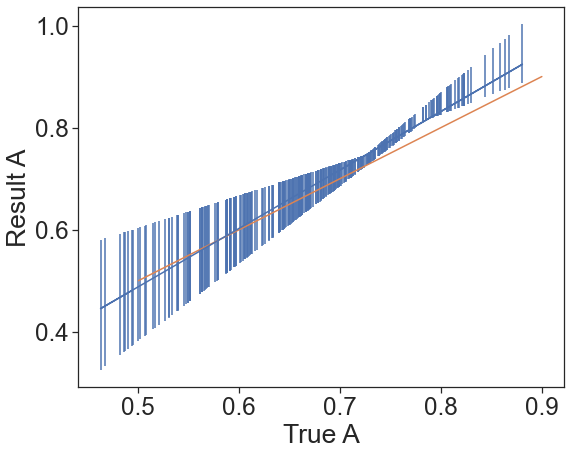

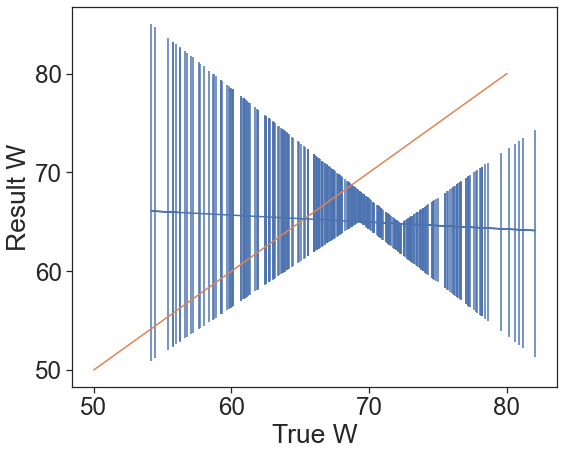

In [20]:
%load_ext autoreload
%autoreload
dEW=[0.1,1,2,4,6,8,10]
snCut=[0.1,1,2,3,4,5]



realizations=[]
parameters=[]

for j in np.arange(0,420,10):
    medianA=[]
    medianW=[]
    for i in range(0,10):
        files=np.sort(glob.glob("data/*"))
        input_string = files[j+i]
        values = GridTools.extract_values_from_string(input_string) # dEW, snCUT, attempt
        print(values)

        Results=np.load(input_string,allow_pickle=True)
        TrueA=Results[0][0]
        TrueW=Results[0][1]

        r16A=np.array(Results[1][0])
        rA=np.array(Results[1][1])
        r84A=np.array(Results[1][2])

        r16W=np.array(Results[2][0])
        rW=np.array(Results[2][1])
        r84W=np.array(Results[2][2])




        chi_square_A = GridTools.calculate_reduced_chi_square(TrueA, rA, np.median([np.abs(r16A-rA),np.abs(r84A-rA)],axis=0))
        #print("Chi-square A value:", chi_square_A)
        chi_square_W = GridTools.calculate_reduced_chi_square(TrueW, rW, np.median([np.abs(r16W-rW),np.abs(r84W-rW)],axis=0))
        #print("Chi-square W value:", chi_square_W)
        medianA.append(chi_square_A)
        medianW.append(chi_square_W)
    parameters.append([values[0],values[1]])
    realizations.append([np.median(medianA),np.median(medianW)])






print(np.median(medianA))
print(np.median(medianW))

plt.rcParams["figure.figsize"] = (8.7,7.)
sns.set_theme(style="ticks",font_scale=2.2)

plt.errorbar(TrueA,rA,yerr=[np.abs(rA-r84A),np.abs(r16A-rA)])
plt.plot([0.5,0.9],[0.5,0.9])
plt.xlabel("True A")
plt.ylabel("Result A")
plt.show()

plt.errorbar(TrueW,rW,yerr=[np.abs(rW-r84W),np.abs(r16W-rW)])
plt.plot([50,80],[50,80])
plt.xlabel("True W")
plt.ylabel("Result W")
plt.show()







In [21]:
for val,AW in zip(parameters,realizations):
    print(val,AW)

[0.1, 0.1] [16.400150581587432, 5.270609762049647]
[0.1, 1.0] [3.600201392096137, 13.828793791190325]
[0.1, 2.0] [30.60884484957618, 5.703892755025374]
[0.1, 3.0] [15.755098345279656, 2.6846037975017736]
[0.1, 4.0] [3.011711580200938, 5.482631652865916]
[0.1, 5.0] [7.98029300225498, 10.219248483134944]
[1.0, 0.1] [16.872867564807272, 8.693234894718497]
[1.0, 1.0] [5.746548366839139, 5.41168028772765]
[1.0, 2.0] [14.04604649375603, 7.156968393394888]
[1.0, 3.0] [11.22254328268485, 7.975791954181635]
[1.0, 4.0] [6.64665205435411, 8.888394374796905]
[1.0, 5.0] [19.285925490153552, 5.638030778414119]
[10.0, 0.1] [8.388188886049697, 4.893596673864737]
[10.0, 1.0] [8.299407968593341, 11.428675140535551]
[10.0, 2.0] [14.405820431514517, 2.1373401381498276]
[10.0, 3.0] [10.467653046416636, 2.8059119357810745]
[10.0, 4.0] [14.742970678372846, 4.509699143438774]
[10.0, 5.0] [11.280655567851124, 3.3777743754162386]
[2.0, 0.1] [4.335406506205935, 5.920700562301951]
[2.0, 1.0] [15.31580331214505, 4

In [17]:
medianA

[1.8309350382838372,
 20.097804519532552,
 231.1506018158274,
 7.584615463151432,
 4.945969422125852,
 18.008681774942275,
 36.83491974172788,
 9.37096180645313,
 2.4907361474835468,
 1.2657735554780702]